# Data Analysis Types: Univariate, Bivariate, and Multivariate Analysis:
1. **Univariate**
2. **Bivariate**
3. **Multivariate**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1. Univariate Analysis

### Definition
- Examines one variable at a time.
- focuses on understanding the distribution, central tendency, and dispersion of a single variable.

### Purpose
- Describe the data's characteristics and patterns
- Identify outliers and anomalies
- Understand the distribution shape (normal, skewed, bimodal, etc.)
- Summarize key statistics of the variable

### Common Techniques

#### Descriptive Statistics
- **Central Tendency**: Mean, Median, Mode
- **Dispersion**: Range, Variance, Standard Deviation, IQR (Interquartile Range)
- **Shape**: Skewness, Kurtosis
- **Position**: Percentiles, Quartiles

#### Visualizations
- **Histogram**: Shows frequency distribution of continuous data
- **Box Plot**: Displays five-number summary (min, Q1, median, Q3, max)
- **Bar Chart**: Shows frequency of categorical data
- **Density Plot**: Smooth version of a histogram


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1. Univariate Analysis

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_style("white")
# plt.rcParams['figure.figsize'] = (20, 6)

In [35]:
df = pd.read_csv('datasets/Titanic-Dataset.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df = df.drop('Cabin', axis=1) # droping Cabin column


In [38]:
df.isna().sum()  # checking null values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [39]:
df = df.dropna()   # Dropping null values. because  `counts, bin_edges = np.histogram(df['Age'], bins=15)` would give error as nan -> nan range not valid

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### Histograms
### Hint: Use `plt.hist()` or `sns.histplot()`

Text(0, 0.5, 'Frequency')

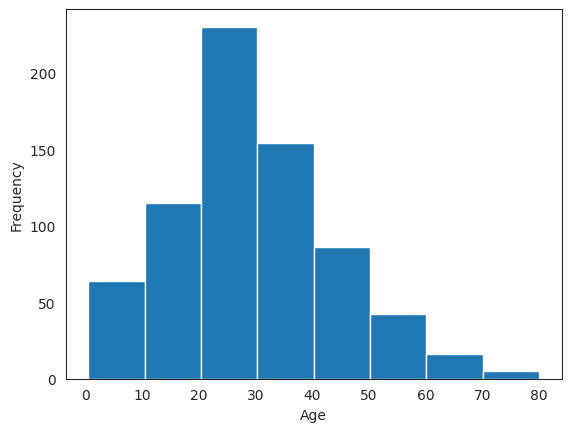

In [41]:
plt.hist(df['Age'], bins=8)
plt.xlabel("Age")
plt.ylabel("Frequency")

### We can create a KDE(Kernel density Estimate) line, by `sns.histplot()`

<Axes: xlabel='Age', ylabel='Count'>

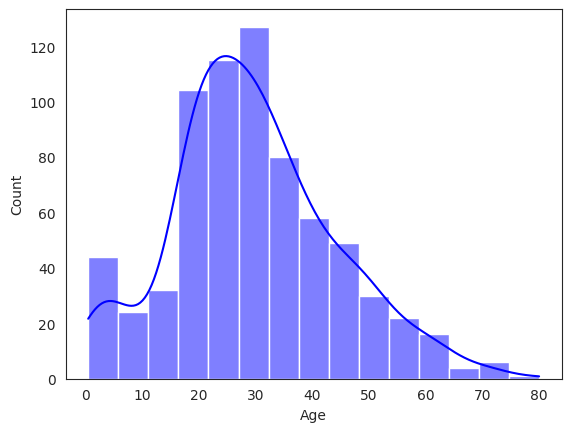

In [42]:
# Sns makes things simple here.. as sns is built on top of matplotlib.
sns.histplot(df['Age'], bins=15, kde=True, color='blue')

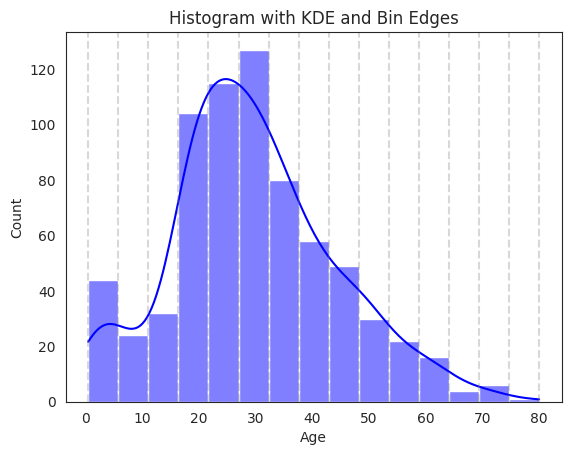

16
[ 0.42        5.72533333 11.03066667 16.336      21.64133333 26.94666667
 32.252      37.55733333 42.86266667 48.168      53.47333333 58.77866667
 64.084      69.38933333 74.69466667 80.        ]
Bin 1: 0.42 – 5.73 → Count: 44
Bin 2: 5.73 – 11.03 → Count: 24
Bin 3: 11.03 – 16.34 → Count: 32
Bin 4: 16.34 – 21.64 → Count: 104
Bin 5: 21.64 – 26.95 → Count: 115
Bin 6: 26.95 – 32.25 → Count: 127
Bin 7: 32.25 – 37.56 → Count: 80
Bin 8: 37.56 – 42.86 → Count: 58
Bin 9: 42.86 – 48.17 → Count: 49
Bin 10: 48.17 – 53.47 → Count: 30
Bin 11: 53.47 – 58.78 → Count: 22
Bin 12: 58.78 – 64.08 → Count: 16
Bin 13: 64.08 – 69.39 → Count: 4
Bin 14: 69.39 – 74.69 → Count: 6
Bin 15: 74.69 – 80.00 → Count: 1


In [ ]:
# Plot histogram
sns.histplot(df['Age'], bins=15, kde=True, color='blue',)

# Calculate bin edges and counts manually
counts, bin_edges = np.histogram(df['Age'], bins=15)

# Annotate bin edges on x-axis
for edge in bin_edges:
    plt.axvline(edge, color='gray', linestyle='--', alpha=0.3)

plt.title("Histogram with KDE and Bin Edges")
plt.show()

# Print bin ranges for inspection
for i in range(len(bin_edges) - 1):
    print(f"Bin {i+1}: {bin_edges[i]:.2f} – {bin_edges[i+1]:.2f} → Count: {counts[i]}")

# Density plot: `sns.kdeplot()`

<Axes: xlabel='Age', ylabel='Density'>

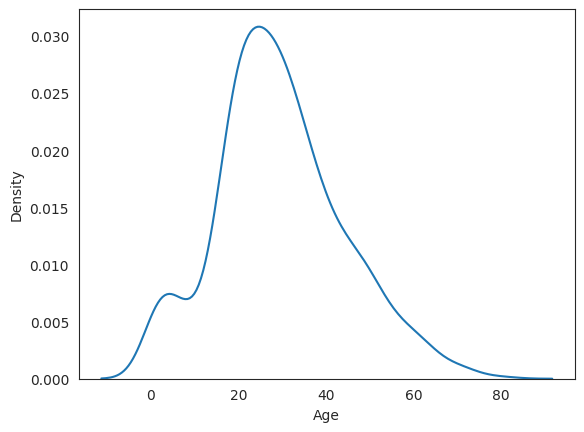

In [44]:
sns.kdeplot(df['Age'])

# Box Plots for Numerical Variables

#### Box plots display the five-number summary of a dataset.
1. **Minimum** (excluding outliers)

2. **Q1** (25th percentile)

3. **Median** (Q2, 50th percentile)

4. **Q3** (75th percentile)

5. **Maximum** (excluding outliers)

**NOTE :** **min(data)** and **max(data)** give the ***raw minimum and maximum*** — which may include outliers. But box-plot excludes the outliers.

#### Hint: Use `sns.boxplot()` or `plt.boxplot()`

{'whiskers': [<matplotlib.lines.Line2D at 0x7dafc41d2fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dafc41d35b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dafc41d2cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dafc41d3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dafc41d3eb0>],
 'means': []}

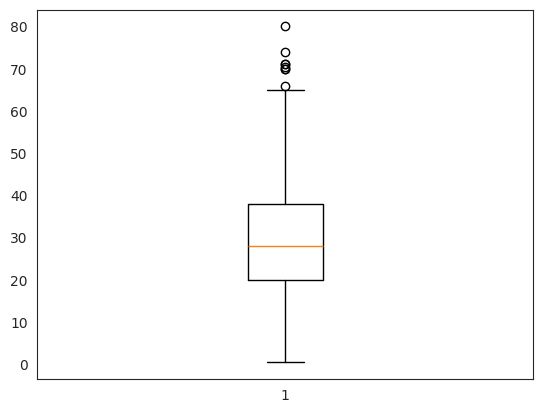

In [45]:
plt.boxplot(df['Age'])

In [46]:
# AS it depics 5 point summary: let's see
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [47]:
df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

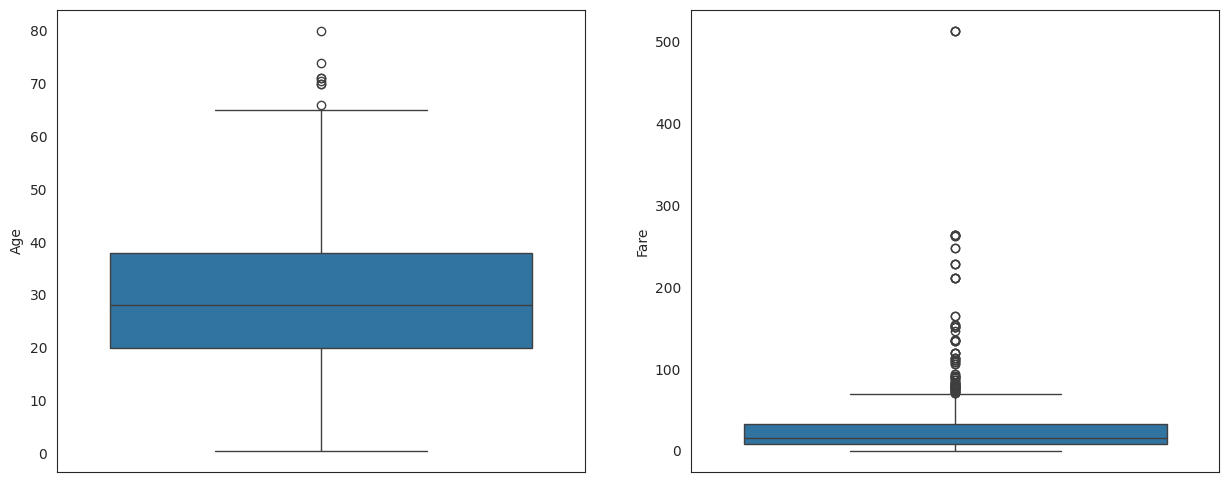

In [48]:
plt.figure(figsize=(15,6) )
plt.subplot(1,2,1)
sns.boxplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

plt.subplots_adjust(wspace=0.2)  # Increase horizontal space between plots

## `sns.countplot()`

<Axes: xlabel='count', ylabel='Sex'>

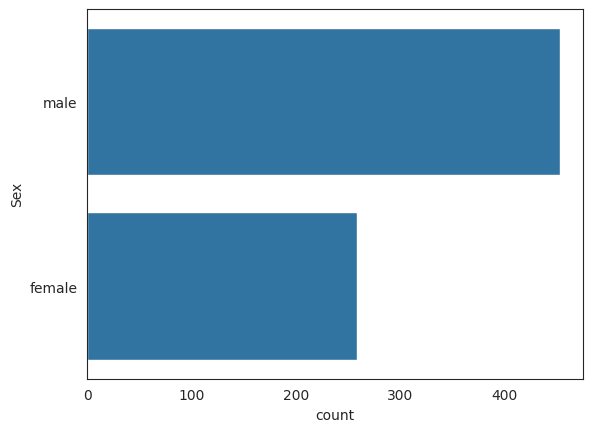

In [49]:
sns.countplot(df['Sex'])

## Bar charts:  
Shows frequency of categorical data

<BarContainer object of 2 artists>

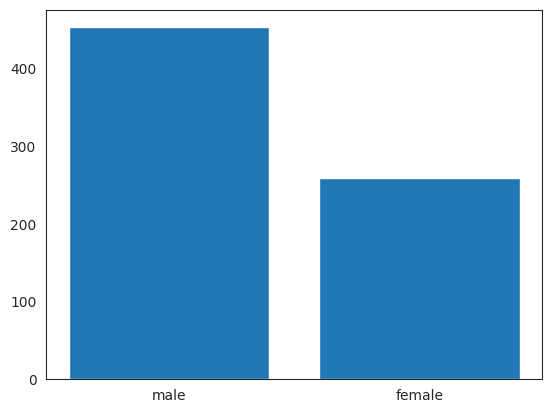

In [50]:
freq = df['Sex'].value_counts()

plt.bar(freq.index, freq.values)

#### Now let's use `sns.barplot()`

Using sns.barplot is quite easy than plt.bar.

<Axes: ylabel='Sex'>

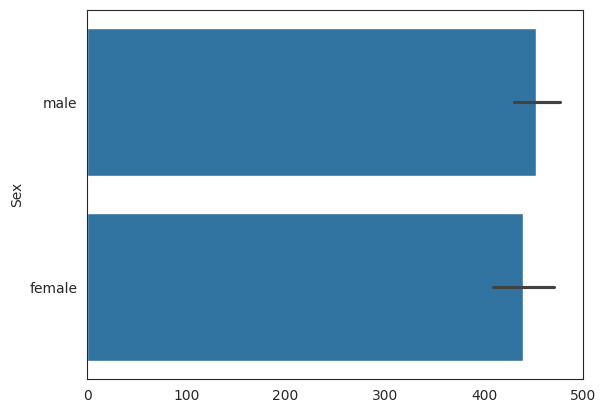

In [51]:
# Let's use Seaborn

sns.barplot(df['Sex'])

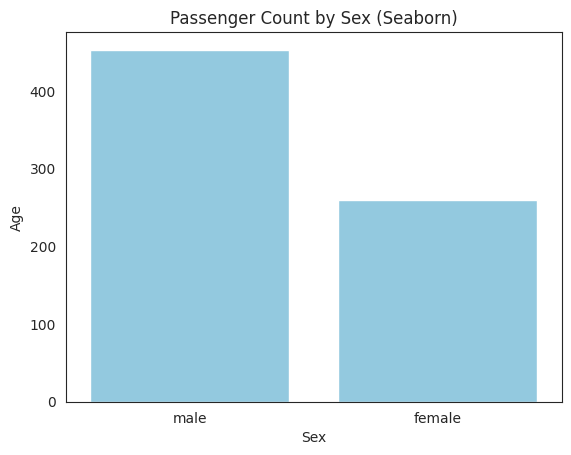

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn does all the grouping for you!
sns.barplot(x='Sex', y='Age', data=df, estimator=len, color='skyblue') # categories are compared with 'len'. 
plt.title('Passenger Count by Sex (Seaborn)')
plt.show()
